<a href="https://colab.research.google.com/github/luccidomingues/Viral-Hepatitis/blob/main/Brazil_Viral_Hepatitis_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise bases hepatite viral datasus

**Foco: Hepatite C**

- Planejamento do mês

https://docs.google.com/document/d/1aQ_Goz2jlIkaNWkTfv9XWtdR2bT192dygeMIT_DBBLw/edit

- Links das bases

http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/hepabr.def

http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/obt10uf.def


## Análise exploratória

**Autores:**
- Luciano Domingues

### Bibliotecas

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Montar drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Diretórios

In [ ]:
%ls /content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/Projetos/'Cronograma Ciência'/'06 - Análise de Julho'/Bases/'HEPATITES Dados de Todos Municipios'/

ls: cannot access '/content/drive/Shareddrives/PJE - Health Lake/[Time] Ciência/Projetos/Cronograma Ciência/06 - Análise de Julho/Bases/HEPATITES Dados de Todos Municipios/': No such file or directory


In [ ]:
path_arquivo = "/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/Projetos/'Cronograma Ciência'/'06 - Análise de Julho'/Bases/'HEPATITES Dados de Todos Municipios'/"
path_arquivo

"/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/Projetos/'Cronograma Ciência'/'06 - Análise de Julho'/Bases/'HEPATITES Dados de Todos Municipios'/"

In [ ]:
path_arquivo + "'Baixar dados de todos os municípios - HEPATITES.xlsx'"

"/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/Projetos/'Cronograma Ciência'/'06 - Análise de Julho'/Bases/'HEPATITES Dados de Todos Municipios'/'Baixar dados de todos os municípios - HEPATITES.xlsx'"

In [ ]:
%cd /content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/Projetos/'Cronograma Ciência'/'06 - Análise de Julho'/Bases/'HEPATITES Dados de Todos Municipios'/

[Errno 2] No such file or directory: '/content/drive/Shareddrives/PJE - Health Lake/[Time] Ciência/Projetos/Cronograma Ciência/06 - Análise de Julho/Bases/HEPATITES Dados de Todos Municipios/'
/content


### Bases

### Ler arquivos Excel
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

#### Número de casos de Hepatite C

In [ ]:
# lista_colunas = ['Hep C Novo 2008',	'Hep C Novo 2009', 'Hep C Novo 2010', 'Hep C Novo 2011', 'Hep C Novo 2012', \
#                 'Hep C Novo 2013', 'Hep C Novo 2014', 'Hep C Novo 2015', 'Hep C Novo 2016', 'Hep C Novo 2017', \
#                 'Hep C Novo 2018', 'Hep C Novo 2019', 'Hep C Novo 2020']
index_cols = "C,F:R"


dados_hepc = pd.read_excel(open('Baixar dados de todos os municípios - HEPATITES.xlsx', 'rb'), sheet_name='DADOS CONTINUAÇÃO 1', usecols=index_cols) 
                         
dados_hepc.columns = ['Local', 'Hep_C_2008', 'Hep_C_2009', 'Hep_C_2010', 'Hep_C_2011', 'Hep_C_2012', \
                 'Hep_C_2013', 'Hep_C_2014', 'Hep_C_2015', 'Hep_C_2016', 'Hep_C_2017', \
                 'Hep_C_2018', 'Hep_C_2019', 'Hep_C_2020']

dados_hepc

,Local,Hep_C_2008,Hep_C_2009,Hep_C_2010,Hep_C_2011,Hep_C_2012,Hep_C_2013,Hep_C_2014,Hep_C_2015,Hep_C_2016,Hep_C_2017,Hep_C_2018,Hep_C_2019,Hep_C_2020
0,Alta Floresta D'Oeste,0,0,0,0,2,2,1,0,1,0,3,3,0
1,Ariquemes,22,10,10,3,18,15,9,15,9,9,4,2,3
2,Cabixi,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Cacoal,4,1,7,7,8,4,5,9,15,17,9,4,3
4,Cerejeiras,0,2,2,2,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,Nordeste,1377,1480,1394,1725,1702,1652,1543,1681,1586,1766,2059,1715,647
5653,Sudeste,12032,12663,12563,14485,14466,13163,12098,13521,13450,12798,13021,10558,4005
5654,Sul,5384,5512,5554,6230,6824,6835,7650,8236,7919,7204,7394,6948,3663
5655,Centro-Oeste,931,1080,839,993,1034,1047,948,951,1124,1015,917,917,489


### Processando tabelas de casos de Hepatite C

#### Dados por região

In [ ]:
dados_regiao_casos = dados_hepc.iloc[5651:5656]
dados_regiao_casos

,Local,Hep_C_2008,Hep_C_2009,Hep_C_2010,Hep_C_2011,Hep_C_2012,Hep_C_2013,Hep_C_2014,Hep_C_2015,Hep_C_2016,Hep_C_2017,Hep_C_2018,Hep_C_2019,Hep_C_2020
5651,Norte,614,860,941,995,908,1364,1123,1029,1057,1148,1134,1055,482
5652,Nordeste,1377,1480,1394,1725,1702,1652,1543,1681,1586,1766,2059,1715,647
5653,Sudeste,12032,12663,12563,14485,14466,13163,12098,13521,13450,12798,13021,10558,4005
5654,Sul,5384,5512,5554,6230,6824,6835,7650,8236,7919,7204,7394,6948,3663
5655,Centro-Oeste,931,1080,839,993,1034,1047,948,951,1124,1015,917,917,489


In [ ]:
dados_regiao_casos = dados_regiao_casos.set_index('Local')
dados_regiao_casos.columns = list(range(2008,2021))
dados_regiao_casos

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Local,,,,,,,,,,,,,
Norte,614,860,941,995,908,1364,1123,1029,1057,1148,1134,1055,482
Nordeste,1377,1480,1394,1725,1702,1652,1543,1681,1586,1766,2059,1715,647
Sudeste,12032,12663,12563,14485,14466,13163,12098,13521,13450,12798,13021,10558,4005
Sul,5384,5512,5554,6230,6824,6835,7650,8236,7919,7204,7394,6948,3663
Centro-Oeste,931,1080,839,993,1034,1047,948,951,1124,1015,917,917,489


In [ ]:
dados_regiao_casos2 = dados_regiao_casos.T
dados_regiao_casos2

Local,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
2008,614,1377,12032,5384,931
2009,860,1480,12663,5512,1080
2010,941,1394,12563,5554,839
2011,995,1725,14485,6230,993
2012,908,1702,14466,6824,1034
2013,1364,1652,13163,6835,1047
2014,1123,1543,12098,7650,948
2015,1029,1681,13521,8236,951
2016,1057,1586,13450,7919,1124
2017,1148,1766,12798,7204,1015


#### Dados por Estado

In [ ]:
dados_estados = dados_hepc.iloc[5624:5651]
# dados_estados

anos_recentes = ['Local','Hep_C_2018','Hep_C_2019','Hep_C_2020']

dados_estados_sumar = dados_estados[anos_recentes]
dados_estados_sumar

,Local,Hep_C_2018,Hep_C_2019,Hep_C_2020
5624,Rondônia,215,140,57
5625,Acre,115,110,40
5626,Amazonas,332,306,156
5627,Roraima,66,61,55
5628,Pará,330,357,145
5629,Amapá,30,36,7
5630,Tocantins,46,45,22
5631,Maranhão,203,172,43
5632,Piauí,50,65,29
5633,Ceará,262,216,93


In [ ]:
dados_estados_sumar.set_index('Local')

,Hep_C_2018,Hep_C_2019,Hep_C_2020
Local,,,
Rondônia,215,140,57
Acre,115,110,40
Amazonas,332,306,156
Roraima,66,61,55
Pará,330,357,145
Amapá,30,36,7
Tocantins,46,45,22
Maranhão,203,172,43
Piauí,50,65,29


### Processando tabelas de taxa de detecção da Hepatite C

In [ ]:
# lista_colunas = ['Hep C Novo 2008',	'Hep C Novo 2009', 'Hep C Novo 2010', 'Hep C Novo 2011', 'Hep C Novo 2012', \
#                 'Hep C Novo 2013', 'Hep C Novo 2014', 'Hep C Novo 2015', 'Hep C Novo 2016', 'Hep C Novo 2017', \
#                 'Hep C Novo 2018', 'Hep C Novo 2019', 'Hep C Novo 2020']
index_cols = "C, EA:EM"


dados_tx_detec_hepc = pd.read_excel(open('Baixar dados de todos os municípios - HEPATITES.xlsx', 'rb'), sheet_name='DADOS CONTINUAÇÃO 1', 
                           usecols=index_cols)

dados_tx_detec_hepc.columns = ['local', 'taxa_deteccao_hep_C_2008', 'taxa_deteccao_hep_c_2009', 'taxa_deteccao_hep_c_2010', 'taxa_deteccao_hep_c_2011', 'taxa_deteccao_hep_c_2012', 'taxa_deteccao_hep_c_2013', 'taxa_deteccao_hep_c_2014', 'taxa_deteccao_hep_c_2015', 'taxa_deteccao_hep_c_2016', 'taxa_deteccao_hep_c_2017', 'taxa_deteccao_hep_c_2018', 'taxa_deteccao_hep_c_2019', 'taxa_deteccao_hep_c_2020']


dados_tx_detec_hepc

,local,taxa_deteccao_hep_C_2008,taxa_deteccao_hep_c_2009,taxa_deteccao_hep_c_2010,taxa_deteccao_hep_c_2011,taxa_deteccao_hep_c_2012,taxa_deteccao_hep_c_2013,taxa_deteccao_hep_c_2014,taxa_deteccao_hep_c_2015,taxa_deteccao_hep_c_2016,taxa_deteccao_hep_c_2017,taxa_deteccao_hep_c_2018,taxa_deteccao_hep_c_2019,taxa_deteccao_hep_c_2020
0,Alta Floresta D'Oeste,0.000000,0.000000,0.000000,0.000000,8.633342,0.000000,0.000000,0.000000,8.729812,0.000000,17.735213,8.937349,0.000000
1,Ariquemes,0.000000,0.000000,2.231645,0.000000,2.174008,8.256616,6.077796,7.954658,15.631717,9.602643,1.886970,3.710851,3.651234
2,Cabixi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Cacoal,0.000000,0.000000,2.534854,5.045154,5.021719,4.837812,4.796508,7.135721,16.513329,18.718705,6.962495,0.000000,0.000000
4,Cerejeiras,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.897680,11.964585,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,Nordeste,1.021202,0.989691,1.096681,1.281530,1.264638,1.250705,1.053175,2.636571,2.304767,2.587049,3.135687,2.514394,1.035009
5653,Sudeste,6.680016,7.041141,7.392021,8.418055,8.317013,7.074811,6.229781,13.372303,13.603079,12.595234,13.032862,10.380162,3.594751
5654,Sul,6.655946,6.814232,8.264949,8.497440,8.841973,9.290695,10.575972,23.790415,23.054703,20.395066,21.508645,19.402393,9.691816
5655,Centro-Oeste,1.968554,2.195545,1.864901,3.039671,2.327093,2.052476,2.178588,4.999171,5.688854,5.136210,4.474372,4.475879,2.221179


In [ ]:
dados_tx_detec_hepc.columns

Index(['local', 'taxa_deteccao_hep_C_2008', 'taxa_deteccao_hep_c_2009',
       'taxa_deteccao_hep_c_2010', 'taxa_deteccao_hep_c_2011',
       'taxa_deteccao_hep_c_2012', 'taxa_deteccao_hep_c_2013',
       'taxa_deteccao_hep_c_2014', 'taxa_deteccao_hep_c_2015',
       'taxa_deteccao_hep_c_2016', 'taxa_deteccao_hep_c_2017',
       'taxa_deteccao_hep_c_2018', 'taxa_deteccao_hep_c_2019',
       'taxa_deteccao_hep_c_2020'],
      dtype='object')

#### Dados por região

In [ ]:
dados_regiao_detec = dados_tx_detec_hepc.iloc[5651:5656]
dados_regiao_detec.columns = ['local'] + list(range(2008,2021))
dados_regiao_detec = dados_regiao_detec.set_index('local')
dados_regiao_detec

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
local,,,,,,,,,,,,,
Norte,1.389858,1.501691,1.743105,1.893745,2.420751,2.328868,2.083975,5.157320,5.018279,5.746128,5.586996,4.920478,2.271297
Nordeste,1.021202,0.989691,1.096681,1.281530,1.264638,1.250705,1.053175,2.636571,2.304767,2.587049,3.135687,2.514394,1.035009
Sudeste,6.680016,7.041141,7.392021,8.418055,8.317013,7.074811,6.229781,13.372303,13.603079,12.595234,13.032862,10.380162,3.594751
Sul,6.655946,6.814232,8.264949,8.497440,8.841973,9.290695,10.575972,23.790415,23.054703,20.395066,21.508645,19.402393,9.691816
Centro-Oeste,1.968554,2.195545,1.864901,3.039671,2.327093,2.052476,2.178588,4.999171,5.688854,5.136210,4.474372,4.475879,2.221179


In [ ]:
dados_regiao_detec2 = dados_regiao_detec.T
dados_regiao_detec2

local,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
2008,1.389858,1.021202,6.680016,6.655946,1.968554
2009,1.501691,0.989691,7.041141,6.814232,2.195545
2010,1.743105,1.096681,7.392021,8.264949,1.864901
2011,1.893745,1.281530,8.418055,8.497440,3.039671
2012,2.420751,1.264638,8.317013,8.841973,2.327093
2013,2.328868,1.250705,7.074811,9.290695,2.052476
2014,2.083975,1.053175,6.229781,10.575972,2.178588
2015,5.157320,2.636571,13.372303,23.790415,4.999171
2016,5.018279,2.304767,13.603079,23.054703,5.688854
2017,5.746128,2.587049,12.595234,20.395066,5.136210


#### Dados por estado

In [ ]:
dados_estados_detec = dados_tx_detec_hepc.iloc[5624:5651]
dados_estados_detec

anos_recentes = ['local','taxa_deteccao_hep_c_2018', 'taxa_deteccao_hep_c_2019', 'taxa_deteccao_hep_c_2020']

dados_estados_detec_sumar = dados_estados_detec[anos_recentes]
dados_estados_detec_sumar

,local,taxa_deteccao_hep_c_2018,taxa_deteccao_hep_c_2019,taxa_deteccao_hep_c_2020
5624,Rondônia,9.103952,6.832802,2.476666
5625,Acre,11.745171,7.487764,4.025495
5626,Amazonas,7.485122,6.736667,2.863161
5627,Roraima,8.177923,7.832427,8.205169
5628,Pará,3.938832,3.731972,1.661247
5629,Amapá,3.622383,3.789377,0.697222
5630,Tocantins,2.334624,2.562647,1.392830
5631,Maranhão,2.715530,2.002602,0.497489
5632,Piauí,1.011937,1.363925,0.709033
5633,Ceará,2.291570,2.127469,0.866657


### Gráfico de número de casos

#### Gráfico de barras do Brasil entre 2018 e 2020

No handles with labels found to put in legend.


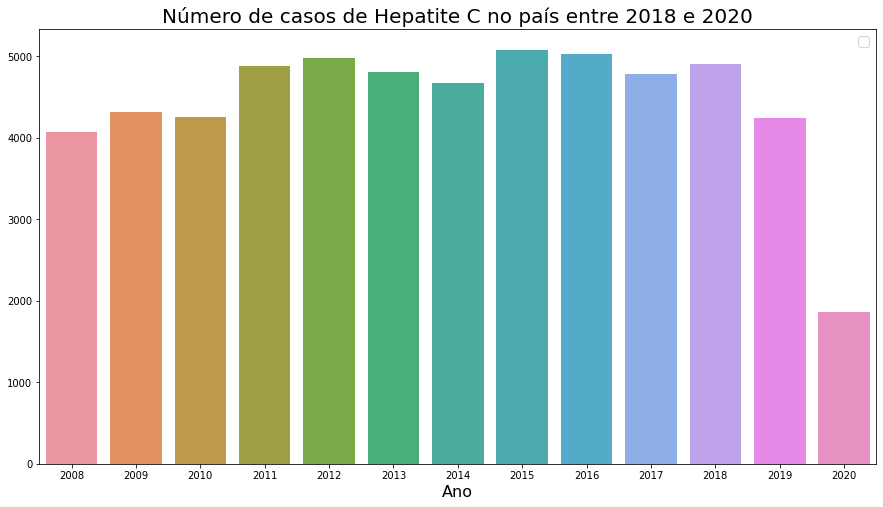

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=dados_regiao_casos, ci=None)

fig.set_title('Número de casos de Hepatite C no país entre 2018 e 2020', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Ano',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# fig.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Gráfico por região

No handles with labels found to put in legend.


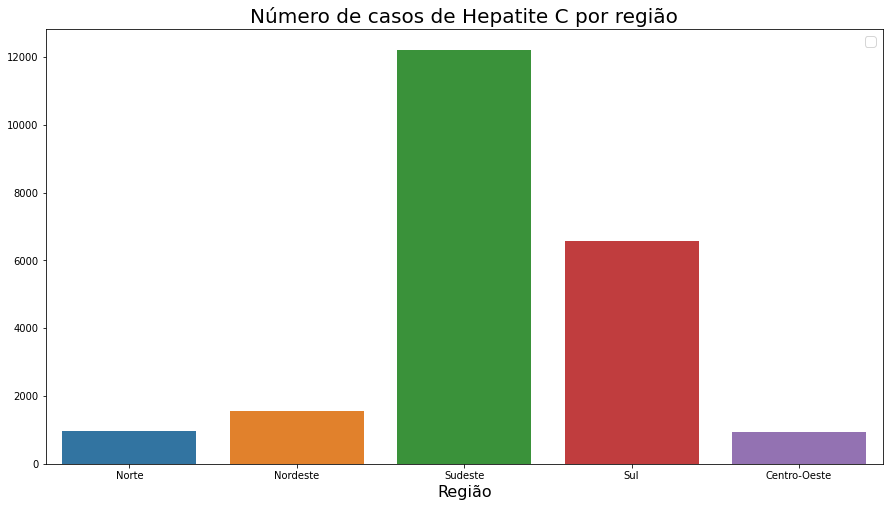

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=dados_regiao_casos2, ci=None)

fig.set_title('Número de casos de Hepatite C por região', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Região',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# fig.savefig('casos_hepat_c_regiao_2018_2020_barra.tiff', bbox_inches='tight', dpi=600)

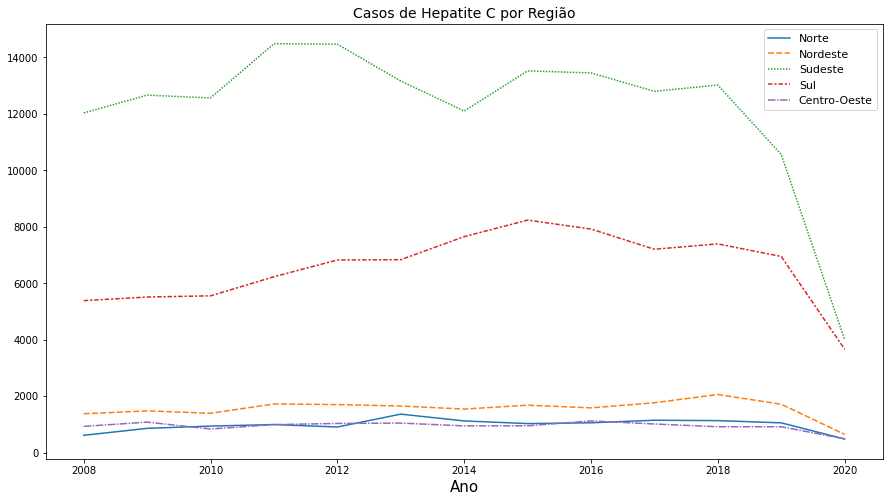

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=dados_regiao_casos2)

fig.set_title('Casos de Hepatite C por Região', fontsize=14)    
fig.legend(title='',fontsize=11, loc='upper right')
plt.xlabel('Ano',fontsize=15)
plt.ylabel('')
plt.show()

# Exportando imagem do gráfico
# fig.savefig('casos_hepat_c_regiao_2018_2020_linha.tiff', bbox_inches='tight', dpi=600)


#### Gráfico por estado

In [ ]:
arr = np.array([[dados_estados_sumar.iloc[0].Local, "2018", float(dados_estados_sumar.iloc[0].Hep_C_2018)],
               [dados_estados_sumar.iloc[0].Local, "2019",float(dados_estados_sumar.iloc[0].Hep_C_2019)],
               [dados_estados_sumar.iloc[0].Local, "2020",float(dados_estados_sumar.iloc[0].Hep_C_2020)]])              


for i in range(len(dados_estados_sumar)):
  if i > 0:
    arr1 = np.array([[dados_estados_sumar.iloc[i].Local, "2018", dados_estados_sumar.iloc[i].Hep_C_2018],
                     [dados_estados_sumar.iloc[i].Local, "2019",dados_estados_sumar.iloc[i].Hep_C_2019],
                     [dados_estados_sumar.iloc[i].Local, "2020",dados_estados_sumar.iloc[i].Hep_C_2020]])
    arr = np.concatenate((arr,arr1),axis=0)

  
df_estados_sum = pd.DataFrame(arr) 
novas_colunas = ['estado', 'ano', 'valor']
df_estados_sum.columns = novas_colunas

df_estados_sum['valor'] = df_estados_sum['valor'].astype(float, errors = 'raise')


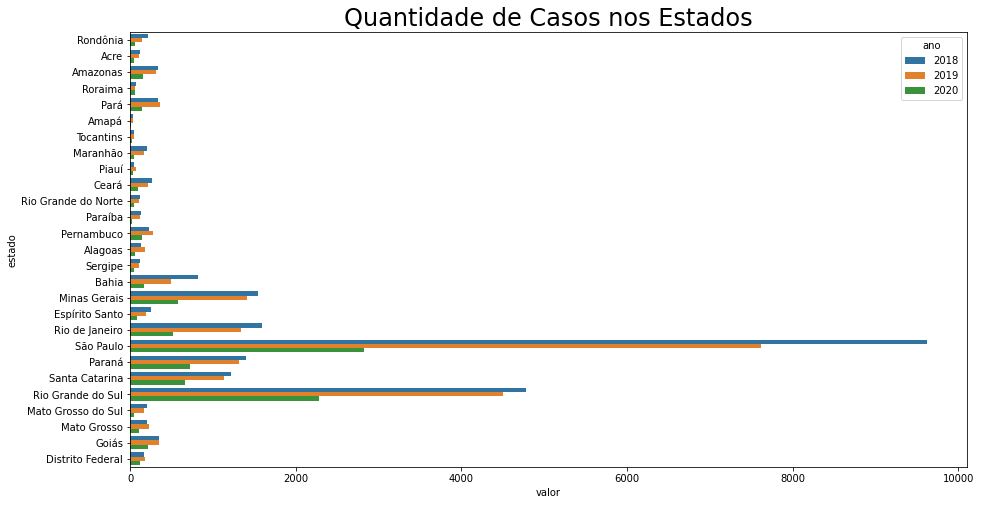

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="valor", y="estado", hue="ano", data=df_estados_sum)
fig.set_title('Quantidade de Casos nos Estados de 2018 a 2020', fontsize=24)    
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x='estado',y='valor',data=df_estados_sum,hue='ano', orient="v")
fig.set_title('Quantidade de Casos nos Estados de 2018 a 2020', fontsize=24)    
plt.xticks(rotation=45)
plt.show()

NameError: ignored

### Gráfico de taxa de detecção

#### Gráfico de barras do Brasil entre 2018 e 2020

No handles with labels found to put in legend.


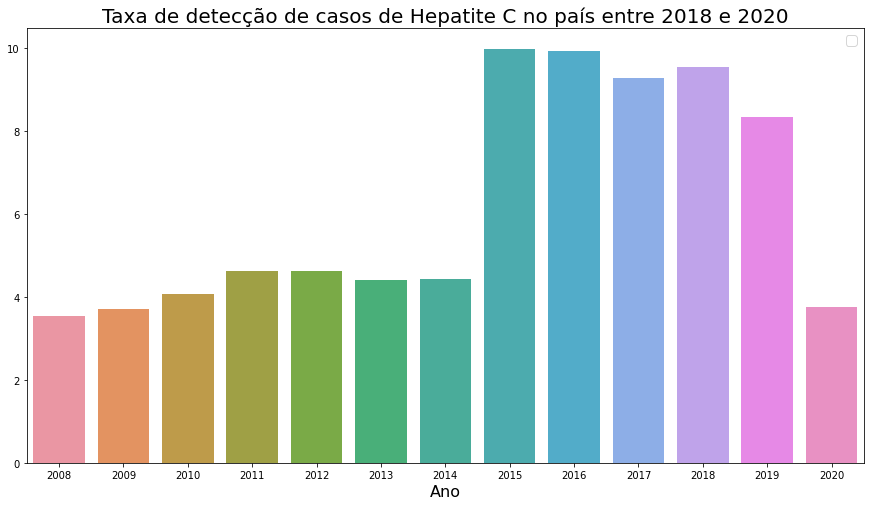

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=dados_regiao_detec, ci=None)

fig.set_title('Taxa de detecção de casos de Hepatite C no país entre 2018 e 2020', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Ano',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# fig.savefig('tx_detec_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Gráfico por região

No handles with labels found to put in legend.


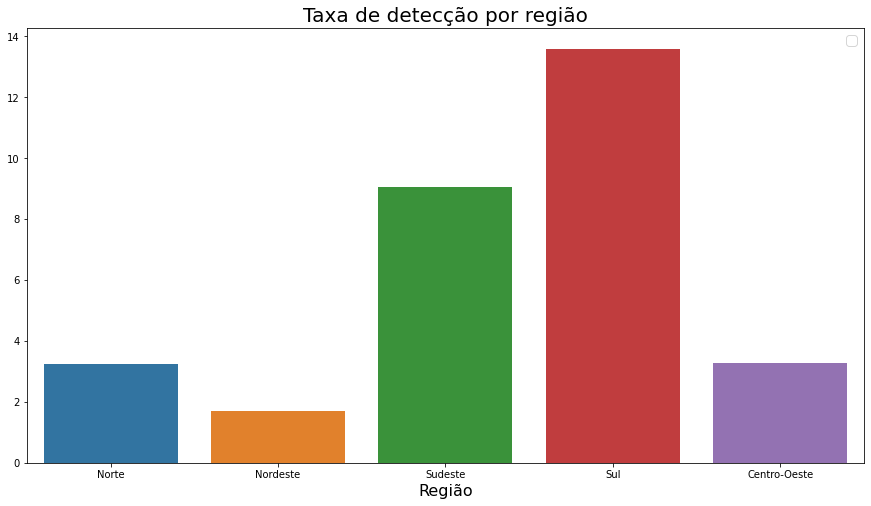

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data=dados_regiao_detec2, ci=None)

fig.set_title('Taxa de detecção por região', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Região',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# fig.savefig('tx_detec_hepat_c_regiao_2018_2020_barra.tiff', bbox_inches='tight', dpi=600)

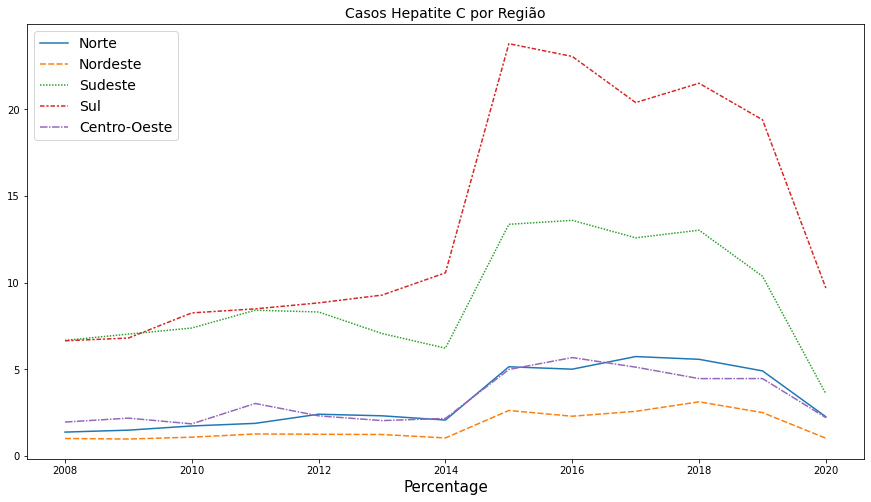

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=dados_regiao_detec2)

fig.set_title('Casos Hepatite C por Região', fontsize=14)    
fig.legend(title='',fontsize=14, loc='upper left')
plt.xlabel('Percentage',fontsize=15)
plt.ylabel('')
plt.show()

# Exportando imagem do gráfico
# fig.savefig('tx_detec_hepat_c_regiao_2018_2020_linha.tiff', bbox_inches='tight', dpi=600)

#### Gráfico por estado

In [ ]:
arr = np.array([[dados_estados_detec_sumar.iloc[0].local, "2018", float(dados_estados_detec_sumar.iloc[0].taxa_deteccao_hep_c_2018)],
                [dados_estados_detec_sumar.iloc[0].local, "2019",float(dados_estados_detec_sumar.iloc[0].taxa_deteccao_hep_c_2019)],
                [dados_estados_detec_sumar.iloc[0].local, "2020",float(dados_estados_detec_sumar.iloc[0].taxa_deteccao_hep_c_2020)]])              

for i in range(len(dados_estados_sumar)):
  if i > 0:
    arr1 = np.array([[dados_estados_detec_sumar.iloc[i].local, "2018", dados_estados_detec_sumar.iloc[i].taxa_deteccao_hep_c_2018],
                     [dados_estados_detec_sumar.iloc[i].local, "2019",dados_estados_detec_sumar.iloc[i].taxa_deteccao_hep_c_2019],
                     [dados_estados_detec_sumar.iloc[i].local, "2020",dados_estados_detec_sumar.iloc[i].taxa_deteccao_hep_c_2020]])
    arr = np.concatenate((arr,arr1),axis=0)

  
df_estados_detec_sum = pd.DataFrame(arr) 
novas_colunas = ['estado', 'ano', 'valor']
df_estados_detec_sum.columns = novas_colunas

df_estados_detec_sum['valor'] = df_estados_detec_sum['valor'].astype(float, errors = 'raise')

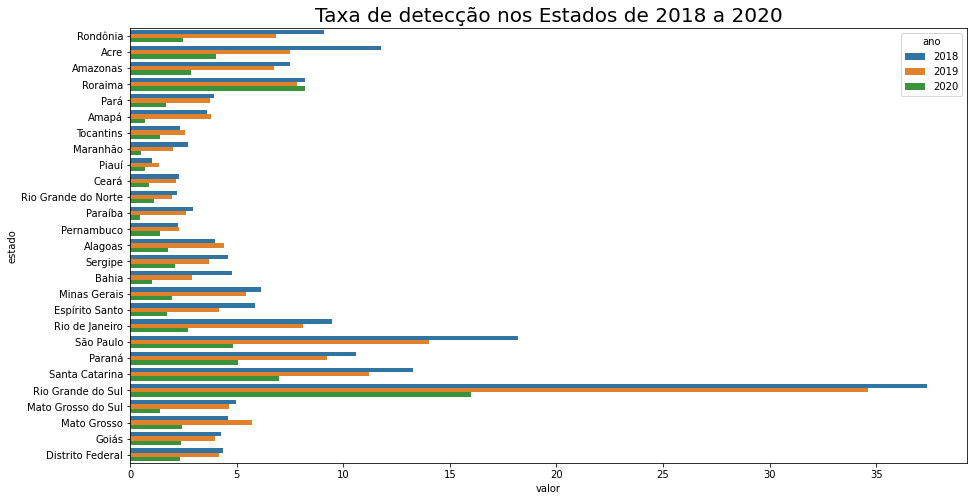

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="valor", y="estado", hue="ano", data=df_estados_detec_sum)
fig.set_title('Taxa de detecção nos Estados de 2018 a 2020', fontsize=20)    
plt.show()

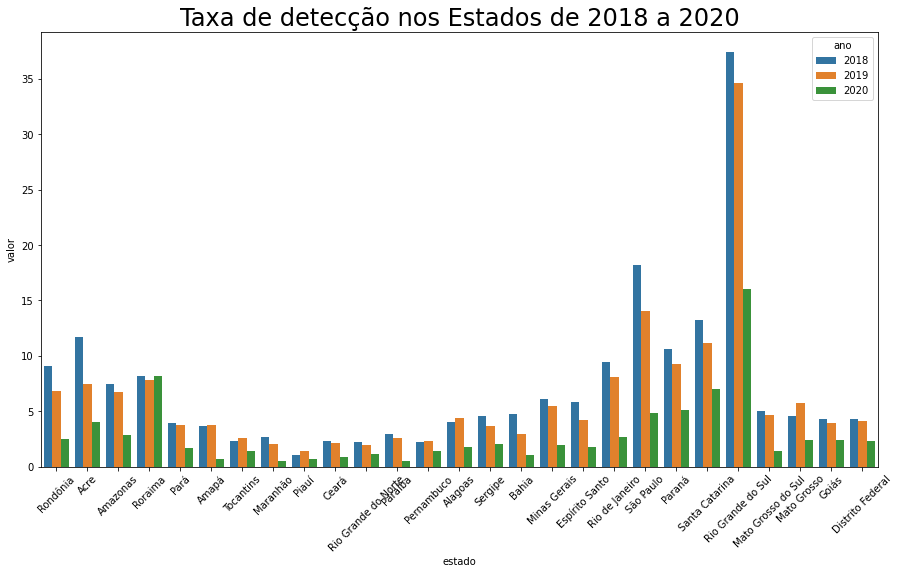

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x='estado',y='valor',data=df_estados_detec_sum,hue='ano', orient="v")
fig.set_title('Taxa de detecção nos Estados de 2018 a 2020', fontsize=24)    
plt.xticks(rotation=45)
plt.show()